In [1]:
%matplotlib inline
import re
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [2]:
# Regular expression to extract eigenvalues from fort.9 file.
regex = re.compile(r'Eigenvalue\s+(.*?):\s+(.*?)\s+(.*?)\s')

ndim = 8
real_parts = []
complex_parts = []
for i in range(ndim):
    real_parts.append([])
    complex_parts.append([])

In [3]:
# Run numerical continuation of equilibrium with AUTO. 
# Then run this cell to read the eigenvalues from the fort.9 file.
with open('fort.9') as f:
    for line in f:
        #print line
        results = regex.search(line)
        if results:
            #print results.group(1), results.group(2), results.group(3)
            index = int(results.group(1)) - 1
            real_parts[index].append(results.group(2))
            complex_parts[index].append(results.group(3))

(-1.1, 1.1)

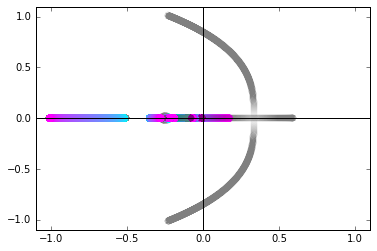

In [4]:
# make color cycler
colors = iter(matplotlib.cm.rainbow(np.linspace(0, 1, ndim)))

#x = np.linspace(0, 2*np.pi, 100)
#plt.plot(np.sin(x), np.cos(x))

plt.axvline(color='black')
plt.axhline(color='black')

#print real_parts
#print complex_parts[0][0:10]

# Bifurcation points for default parameters.
LP1 = 650
LP2 = 1625
HB1 = 5423

for real, comp in zip(real_parts, complex_parts):
    which = LP1
    num_points = 400
    plt.scatter(real, comp, s=40, color='grey', alpha=0.005)#matplotlib.cm.cool(np.linspace(0, 1, num_points*2)))
    plt.scatter(real[which-num_points:which+num_points], comp[which-num_points:which+num_points], s=40, color=matplotlib.cm.cool(np.linspace(0, 1, num_points*2)))
    #plt.scatter(real[LP1], comp[LP1], marker='*')
    #plt.scatter(real[LP1+1], comp[LP1+1], marker='v')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)